# Regresión y clasificación

## Clasificación

Entregable: Construir una red neuronal de clasificación binaria para predecir el cáncer de seno. Use los datos Breast Cancer Wisconsin. Los datos los puede encontrar en el enlace de Kaggle.

## 1. Importar librerías

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
from tensorflow.keras.models import Sequential
#
from tensorflow.keras.layers import Dense, Dropout
#
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

## 2. Carga de datos

In [2]:
#cargamos los datos de entrada - forma 2
data_w = pd.read_csv("wisconsin.csv")
del data_w['Unnamed: 32']
data_w.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Preprocesamiento

In [3]:
x = data_w.iloc[:,2:].values # extrae como tensores numpy
y = data_w.iloc[:,1].values

In [4]:
# Recodificación de variable objetivo
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [5]:
# Datos de entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

x_test.shape

(57, 30)

In [6]:
# Normalización de los datos
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 4. Creación del modelo Sequential

In [7]:
classifier = Sequential()
## Adiciona capas una por una
classifier.add(Dense(units=16, activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1)) # 10% out in each epoc
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting (regularización)
classifier.add(Dropout(0.1))
classifier.add(Dense(units=1, activation='sigmoid'))

## 5. Compila

In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


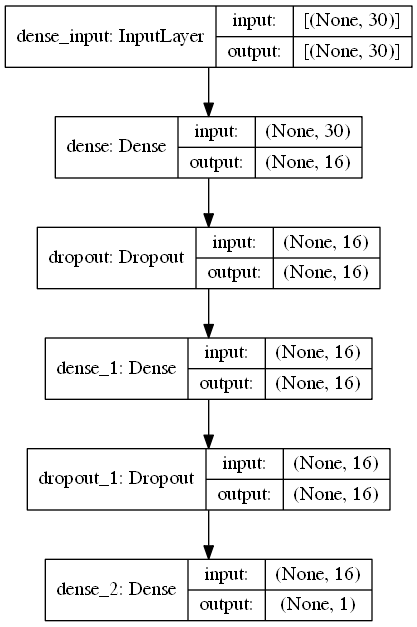

In [9]:
classifier.summary()
plot_model(classifier, to_file='cancer_seno.png', 
           show_shapes=True)

## 6. Entrenamiento

In [10]:
history = classifier.fit(x_train, y_train, batch_size=32, epochs=150, validation_split = 0.2)

Epoch 1/150
13/13 [==============================] - 4s 174ms/step - loss: 0.6474 - accuracy: 0.6208 - val_loss: 0.5820 - val_accuracy: 0.6796
Epoch 2/150
13/13 [==============================] - 0s 18ms/step - loss: 0.5585 - accuracy: 0.7291 - val_loss: 0.5026 - val_accuracy: 0.7864
Epoch 3/150
13/13 [==============================] - 0s 15ms/step - loss: 0.4765 - accuracy: 0.7668 - val_loss: 0.4354 - val_accuracy: 0.8447
Epoch 4/150
13/13 [==============================] - 0s 19ms/step - loss: 0.4208 - accuracy: 0.8025 - val_loss: 0.3738 - val_accuracy: 0.9126
Epoch 5/150
13/13 [==============================] - 0s 16ms/step - loss: 0.3467 - accuracy: 0.9046 - val_loss: 0.3197 - val_accuracy: 0.9223
Epoch 6/150
13/13 [==============================] - 0s 17ms/step - loss: 0.3134 - accuracy: 0.9050 - val_loss: 0.2729 - val_accuracy: 0.9320
Epoch 7/150
13/13 [==============================] - 0s 13ms/step - loss: 0.2741 - accuracy: 0.9101 - val_loss: 0.2314 - val_accuracy: 0.9417
Epoch

## 7. Predicciones

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#y_pred = (y_pred > 0.5)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <=0.5] = 0

## 8. Matriz de confusión

In [12]:
cm = confusion_matrix(y_test, y_pred)

In [13]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/y_test.shape[0])*100))

Our accuracy is 100.0%


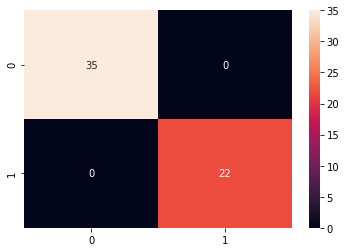

In [14]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

## 9. Evaluación del modelo

In [15]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

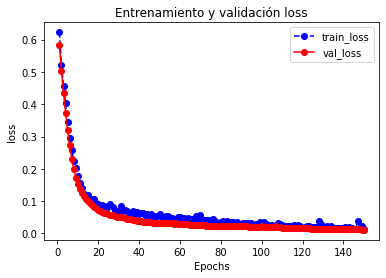

In [16]:
plot_metric(history, 'loss')

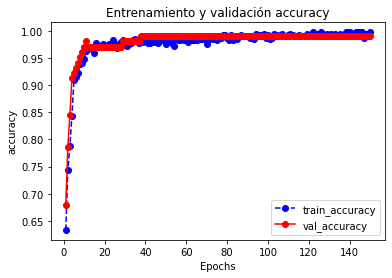

In [17]:
plot_metric(history, 'accuracy')